## Homework 1

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib

/Users/yeungadrian/Documents/repo/OnlineLearning/venv/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


This is due on Thurs, 6/1

## 1.

 Consider the polynomial $p(x) = (x-2)^9 = x^9 - 18x^8 + 144x^7 - 672x^6 + 2016x^5 - 4032x^4 + 5376x^3 - 4608x^2 + 2304x - 512$

  a. Plot $p(x)$ for $x=1.920,\,1.921,\,1.922,\ldots,2.080$ evaluating $p$ via its coefficients $1,\,,-18,\,144,\ldots$

  b. Plot the same plot again, now evaluating $p$ via the expression $(x-2)^9$.

  c. Explain the difference.
  
  *(The numpy method linspace will be useful for this)*

In [43]:
def expandedPolynomial(x):
    return (
        np.power(x, 9)
        - np.prod([18, np.power(x, 8)])
        + np.prod([144 , np.power(x, 7)])
        - np.prod([672 , np.power(x, 6)])
        + np.prod([2016 , np.power(x, 5)])
        - np.prod([4032 , np.power(x, 4)])
        + np.prod([5376 , np.power(x, 3)])
        - np.prod([4608 , np.power(x, 2)])
        + np.prod([2304 , np.power(x, 1)])
        - 512
    )


def polynomial(x):
    return np.power(x - 2, 9)


In [58]:
def tabularisePolynomial(expanded):
    index = []
    value = []
    x = 1.92
    for x in np.linspace(1.92, 2.08, 161):
        if expanded:
            value.append(expandedPolynomial(x))
        else:
            value.append(polynomial(x))

    return pd.DataFrame({'value':value})

In [59]:
tabularisePolynomial(True).head()

,value
0,-1.346052e-10
1,-1.246008e-10
2,-1.173248e-10
3,-9.094947e-11
4,-8.822099e-11


<AxesSubplot:>

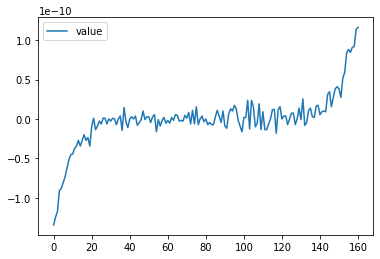

In [60]:
tabularisePolynomial(True).plot()

<AxesSubplot:>

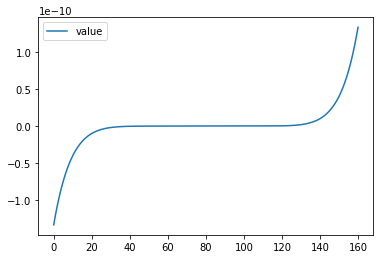

In [61]:
tabularisePolynomial(False).plot()

c) Difference due to floating point precisio

For example np.linspace(1.92, 2.08, 161)[86] is not exactly 2.006, which then causes large differences via the expansion

In [69]:
np.linspace(1.92, 2.08, 161)[86]

2.0060000000000002

## 2\. How many different double-precision numbers are there?  Express your answer using powers of 2

$$\varepsilon_{machine} = 2^{-53} \approx 1.11 \times 10^{-16}$$
- Numbers can be as large as $1.79 \times 10^{308}$ and as small as $2.23 \times 10^{-308}$.

Can't really trust numbers smaller than machine epsilon

## 3\. Using the updated [Numbers Every Programmer Should Know](https://people.eecs.berkeley.edu/~rcs/research/interactive_latency.html), how much longer does a main memory reference take than an L1 cache look-up?  How much longer does a disk seek take than a main memory reference?

L1 cache reference: 1ns

Main Memory = 100ns

100x between L1 and main memory

Disk Seek: 2,000,000ns

20,000x between main memory and disk seek


## 4\. From the Halide Video, what are 4 ways to traverse a 2d array?

1. Scan Line order, sequentially across y, then sequentially across x (row traverse) 
2. We can transpose x and y, so we get a column traverse
3. Scan line order, but do x in vectors of 4
4. Distribute scanlines across threads so we have parrallel y and vectorize x by 4, Split x and y dimensions into tiles (e.g. split x by 4 and split y by 4)

## 5\. Using the animations below ([source](https://www.youtube.com/watch?v=3uiEyEKji0M)), explain what the benefits and pitfalls of each approach. Green squares indicate that a value is being read; red indicates a value is being written. Your answers should be longer in length (give more detail) than just two words.

a. <img src="images/Halide1.gif" alt="Halide" style="width: 70%"/>

b. <img src="images/Halide2.gif" alt="Halide" style="width: 70%"/>

c. <img src="images/Halide3.gif" alt="Halide" style="width: 70%"/>

a) 
- Computes all inputs ahead of time, before starting the output
- Poor locality, by the time we start computing the output, the required inputs have been removed from cache (limited by system memory)

b) 
- Maximum locality, use inputs for output immediately
- Lots of redundant calculations, the blurred in x stage is recomputed many times

c) 
- We've allocated enough memory to store all the intermediate stage
- We have locality and no redundant calculations
- Introduced serial dependence, we need scanline n-1, to compute scanline n
- Cannot parrallelise

## 6\. Prove that if $A = Q B Q^T$ for some orthnogonal matrix $Q$, the $A$ and $B$ have the same singular values.


$A = Q B Q^T$

$AQ = Q B Q^TQ$

$AQ = Q B I $

$AQ = Q B $

Eigenvector of $Q B Q^T$ is ${\mid \mid B \mid \mid}^2 $

For a square orthogonal matrix Q:

${\mid \mid Qx \mid \mid}^2 = {\mid \mid x \mid \mid}^2$ (orthogonal transformation preserves lengths in the usual Euclidan norm, or 2-norm)

And so singular values for A & B must be identical



## 7\. What is the *stochastic* part of *stochastic gradient descent*?

- Stochastic means random
- SGD randomly picks one data point from the whole data set at each iteration to reduce the computations enormously.
- You calculate the gradient on random batches, and so the gradient is not predetermined. Depends on what's in the batches and the order